In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F

# Carga de datos


In [0]:
transform = transforms.Compose([
                                transforms.Resize((28,28)),
                                transforms.ToTensor(), 
                                transforms.Normalize((0.5,),(0.5,))
                                ])

training_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
validation_data = datasets.MNIST(root='./data', train=False , download=True, transform=transform)

training_loader = torch.utils.data.DataLoader(dataset=training_data, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_data, batch_size=100, shuffle=False)

#Visualización datos cargados

In [0]:
def img_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1,2,0)
  image = image*np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0,1)
  return image



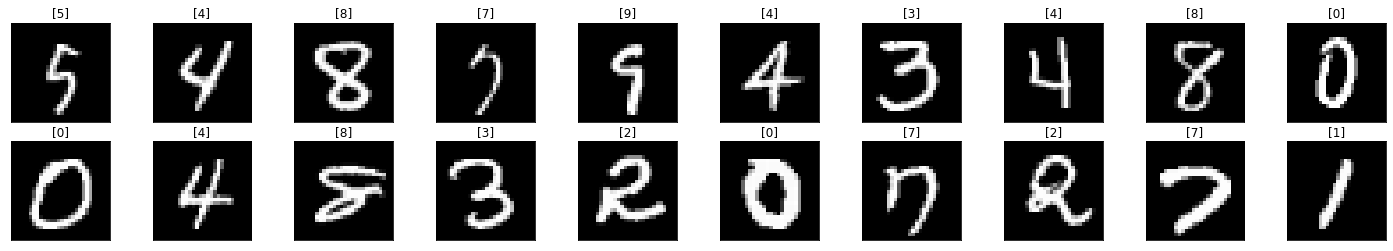

In [4]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax  = fig.add_subplot(2,10,idx+1, xticks =[], yticks=[])
  plt.imshow(img_convert(images[idx]))
  ax.set_title([labels[idx].item()])


# Creación y entrenamiento del modelo


In [0]:
class Classifier(nn.Module):

  def __init__(self, input_size, hidden1_size, hidden2_size, output_size):
    super().__init__()
    self.epochs = 12

    self.loss_history = []
    self.accuracy_history = []
    self.val_loss_history = []
    self.val_accuracy_history = []
    
    self.linear1 = nn.Linear(input_size, hidden1_size)
    self.linear2 = nn.Linear(hidden1_size, hidden2_size)
    self.linear3 = nn.Linear(hidden2_size, output_size)

  def config_optim(self, criterion, optimizer):
    self.criterion = criterion
    self.optimizer = optimizer    
  
  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x

  def train(self):
    for i in range(self.epochs):

      running_loss = 0.0
      running_corrects = 0

      val_running_loss = 0.0
      val_running_corrects = 0


      for inputs, labels in training_loader:
        inputs = inputs.view(inputs.shape[0], -1)
        outputs = model(inputs)
        loss = self.criterion(outputs, labels)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)
        running_loss += loss.item()

      else:
        with torch.no_grad():
          for val_inputs, val_labels in validation_loader:
            val_inputs = val_inputs.view(val_inputs.shape[0], -1)
            val_outputs = model(val_inputs)
            val_loss = self.criterion(val_outputs, val_labels)

            _, val_preds = torch.max(val_outputs, 1)
            val_running_corrects += torch.sum(val_preds == val_labels.data)
            val_running_loss += val_loss.item()

        epoch_loss = running_loss / len(training_loader)
        epoch_accuracy  = running_corrects / len(training_loader)

        val_epoch_loss = val_running_loss / len(validation_loader)
        val_epoch_accuracy  = val_running_corrects / len(validation_loader)

        self.loss_history.append(epoch_loss)
        self.accuracy_history.append(epoch_accuracy)

        self.val_loss_history.append(val_epoch_loss)
        self.val_accuracy_history.append(val_epoch_accuracy)

        print("Epoch: ", i+1)
        print("Training Loss: {:.4f} - Training Accuraccy: {:.4f}".format(epoch_loss, epoch_accuracy.item()))
        print("Validation Loss: {:.4f} - Validation Accuracy: {:.4f}".format(val_epoch_loss, val_epoch_accuracy.item()))


  def predict(self, img):
    img = img.view(img.shape[0], -1)
    output = model(img)
    _, pred = torch.max(output, 1)
    return pred

In [0]:
model = Classifier(784,125,64,10)
model.config_optim(nn.CrossEntropyLoss(), torch.optim.Adam(params=model.parameters(), lr=0.001))

In [7]:
model.train()

Epoch:  1
Training Loss: 0.4375 - Training Accuraccy: 87.0000
Validation Loss: 0.2510 - Validation Accuracy: 92.0000
Epoch:  2
Training Loss: 0.2153 - Training Accuraccy: 93.0000
Validation Loss: 0.1756 - Validation Accuracy: 94.0000
Epoch:  3
Training Loss: 0.1574 - Training Accuraccy: 95.0000
Validation Loss: 0.1439 - Validation Accuracy: 95.0000
Epoch:  4
Training Loss: 0.1282 - Training Accuraccy: 96.0000
Validation Loss: 0.1163 - Validation Accuracy: 96.0000
Epoch:  5
Training Loss: 0.1027 - Training Accuraccy: 96.0000
Validation Loss: 0.1111 - Validation Accuracy: 96.0000
Epoch:  6
Training Loss: 0.0893 - Training Accuraccy: 97.0000
Validation Loss: 0.1112 - Validation Accuracy: 96.0000
Epoch:  7
Training Loss: 0.0799 - Training Accuraccy: 97.0000
Validation Loss: 0.1034 - Validation Accuracy: 96.0000
Epoch:  8
Training Loss: 0.0722 - Training Accuraccy: 97.0000
Validation Loss: 0.0976 - Validation Accuracy: 96.0000
Epoch:  9
Training Loss: 0.0655 - Training Accuraccy: 97.0000
Va

# Visualización de resultados


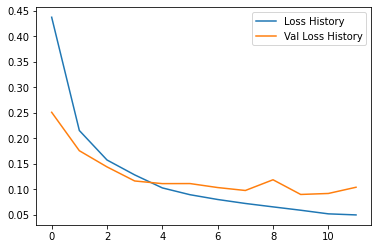

In [8]:
plt.plot(model.loss_history, label="Loss History")
plt.plot(model.val_loss_history, label="Val Loss History")
plt.legend()

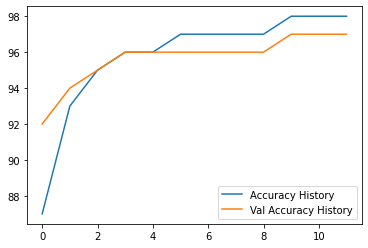

In [9]:
plt.plot(model.accuracy_history, label="Accuracy History")
plt.plot(model.val_accuracy_history, label="Val Accuracy History")
plt.legend()

# Prueba con imagen de internet


<Response [200]>


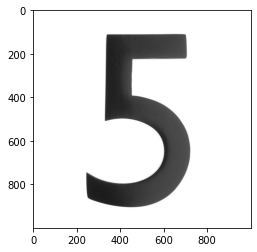

In [10]:
import requests
from PIL import Image
import PIL.ImageOps

url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'

response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

print(response)

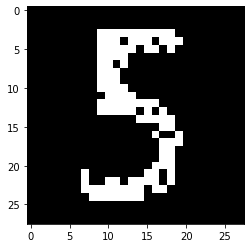

In [11]:
img = img.convert('L')
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img)
plt.imshow(img_convert(img))

In [12]:
pred = model.predict(img)
print(pred)

tensor([5])


# Prueba con imágenes del conjunto de validación

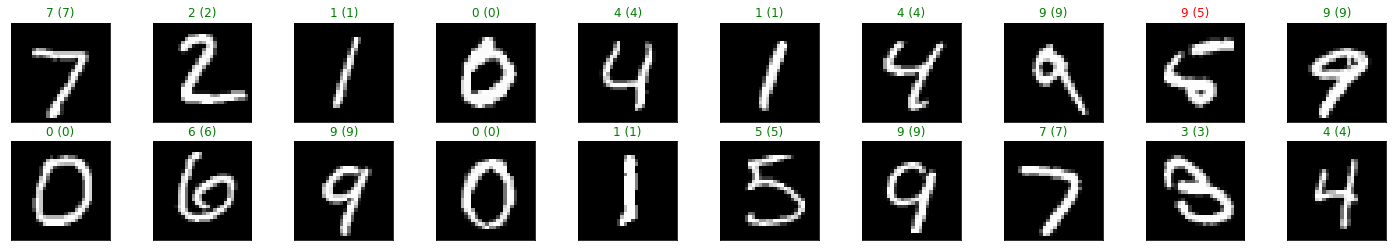

In [17]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
preds = model.predict(images)


fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax  = fig.add_subplot(2,10,idx+1, xticks =[], yticks=[])
  plt.imshow(img_convert(images[idx]))
  ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx] == labels[idx] else "red"))